In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import classification_report
from tensorflow.keras import datasets
from tensorflow.keras.models import Model


In [12]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
y_true = y_test

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 168s 15us/step


In [13]:
# parsing through the dataset

img_row, img_cols = 28, 28
input_shape = (img_row, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_cols, img_row, 1)
x_test = x_test.reshape(x_test.shape[0], img_cols, img_row, 1)

print("Train set shape", x_train.shape, 'trainlabel shape', y_train.shape)
print('test set shape', x_test.shape, 'test labels:', y_test.shape)

Train set shape (60000, 28, 28, 1) trainlabel shape (60000,)
test set shape (10000, 28, 28, 1) test labels: (10000,)


In [14]:
# split the train set to validatation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)
print('Val_set shape:', x_val.shape, 'val_label shape:', y_val.shape)
print('Test_set shape:', x_test.shape, 'y_test shape:', y_test.shape)

X_train shape: (48000, 28, 28, 1) X_label shape: (48000,)
Val_set shape: (12000, 28, 28, 1) val_label shape: (12000,)
Test_set shape: (10000, 28, 28, 1) y_test shape: (10000,)


In [15]:
# normalization of data
x_train = (x_train - x_train.mean()) / x_train.std()
x_val = (x_val - x_val.mean()) / x_val.std()
x_test = (x_test - x_test.mean()) / x_test.std()

In [16]:
num_labels = 10
# formatting the data for model input
im_row = 227
im_col = 227

def reformat(dataset):
    dataset = np.asarray([img_to_array(array_to_img(im, scale=False).resize((im_row, im_col))) for im in dataset])
    return dataset

y_train = keras.utils.to_categorical(y_train)
x_train  = reformat(x_train)
print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)

y_test = keras.utils.to_categorical(y_test)
x_test  = reformat(x_test)
print('test set shape:', x_test.shape, 'test label shape', y_test.shape)

y_val = keras.utils.to_categorical(y_val)
x_val  = reformat(x_val)
print('val set shape:', x_val.shape, 'val_lavels shape:', y_val.shape)

X_train shape: (48000, 227, 227, 1) X_label shape: (48000, 10)
test set shape: (10000, 227, 227, 1) test label shape (10000, 10)
val set shape: (12000, 227, 227, 1) val_lavels shape: (12000, 10)


# AlexNet Architecture

In [48]:
# Defining AlexNet architecture

batch_size = 200
num_classes = 10
epochs = 8

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,1), kernel_size=(11, 11), strides=(4, 4), activation='relu', kernel_initializer='he_normal'))

# batch normalization layer
model.add(BatchNormalization())

# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', kernel_initializer='he_normal'))

# batch normalization layer
model.add(BatchNormalization())

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 3rd Convolutional Layer
#model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same', kernel_initializer='he_normal'))

# 4th Convolutional Layer
#model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same', kernel_initializer='he_normal'))

# 5th Convolutional Layer
#model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same', kernel_initializer='he_normal'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Passing it to a Fully Connected layer
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# 2nd Fully Connected Layer
model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))

# Add Dropout
model.add(Dropout(0.5))

# 3rd Fully Connected Layer
model.add(Dense(1000, activation='relu', kernel_initializer='he_normal'))

# Add Dropout
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(num_classes, activation='softmax', kernel_initializer='he_normal'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy']) 


c:\Users\cglab\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 55, 55, 96)     │        11,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 23, 23, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 23, 23, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 11, 11, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,832,194 (193.91 MB)

 Trainable params: 50,831,490 (193.91 MB)

 Non-trainable params: 704 (2.75 KB)

In [50]:
hist = model.fit(x_train, y_train, batch_size= batch_size, epochs= epochs, verbose=1, validation_data=(x_val,y_val))
model.save('new_model.h5')

Epoch 1/8
240/240 ━━━━━━━━━━━━━━━━━━━━ 643s 3s/step - accuracy: 0.2486 - loss: 3.8911 - val_accuracy: 0.8781 - val_loss: 0.4244
Epoch 2/8
240/240 ━━━━━━━━━━━━━━━━━━━━ 640s 3s/step - accuracy: 0.9457 - loss: 0.1891 - val_accuracy: 0.9532 - val_loss: 0.1614
Epoch 3/8
240/240 ━━━━━━━━━━━━━━━━━━━━ 652s 3s/step - accuracy: 0.9681 - loss: 0.1103 - val_accuracy: 0.9680 - val_loss: 0.1167
Epoch 4/8
240/240 ━━━━━━━━━━━━━━━━━━━━ 639s 3s/step - accuracy: 0.9753 - loss: 0.0867 - val_accuracy: 0.9709 - val_loss: 0.0994
Epoch 5/8
240/240 ━━━━━━━━━━━━━━━━━━━━ 637s 3s/step - accuracy: 0.9779 - loss: 0.0847 - val_accuracy: 0.9751 - val_loss: 0.0932
Epoch 6/8
240/240 ━━━━━━━━━━━━━━━━━━━━ 638s 3s/step - accuracy: 0.9780 - loss: 0.0797 - val_accuracy: 0.9793 - val_loss: 0.0692
Epoch 7/8
240/240 ━━━━━━━━━━━━━━━━━━━━ 634s 3s/step - accuracy: 0.9834 - loss: 0.0550 - val_accuracy: 0.9805 - val_loss: 0.0705
Epoch 8/8
240/240 ━━━━━━━━━━━━━━━━━━━━ 634s 3s/step - accuracy: 0.9831 - loss: 0.0608 - val_accuracy: 0.

In [51]:
score = model.evaluate(x_test, y_test, verbose= 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.9720 - loss: 0.1029
Test loss: 0.08602000027894974
Test accuracy: 0.9765999913215637


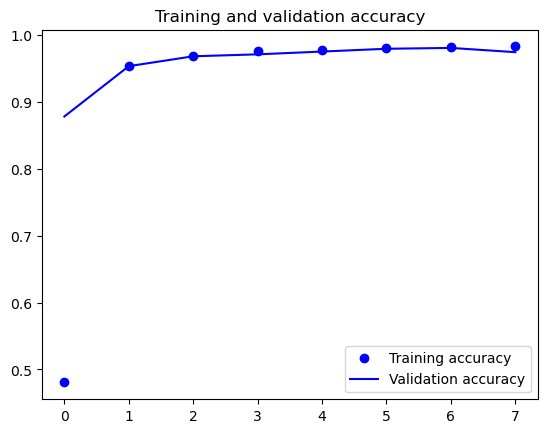

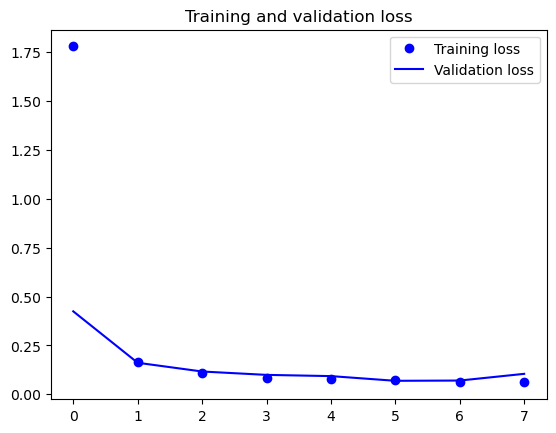

In [52]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [53]:
# Get the predictions for the test data
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Assuming y_true is the true labels for x_test
# Get the indices to be plotted
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step


In [54]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99       980
     Class 1       0.96      0.99      0.98      1135
     Class 2       0.99      0.96      0.98      1032
     Class 3       0.98      0.99      0.98      1010
     Class 4       0.96      0.99      0.98       982
     Class 5       0.98      0.98      0.98       892
     Class 6       0.98      0.96      0.97       958
     Class 7       0.96      0.98      0.97      1028
     Class 8       0.99      0.96      0.98       974
     Class 9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



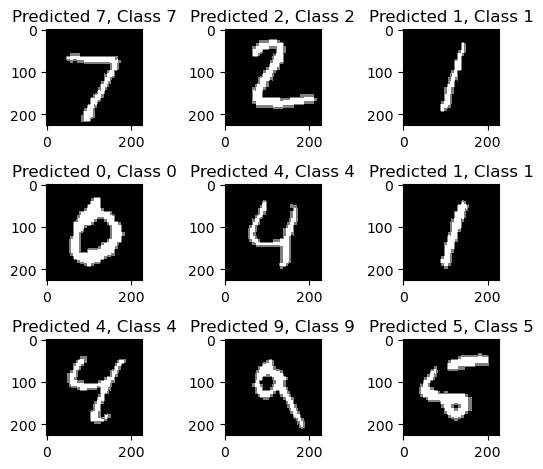

In [55]:
for i, c in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[c].reshape(227,227), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[c], y_true[c]))
    plt.tight_layout()

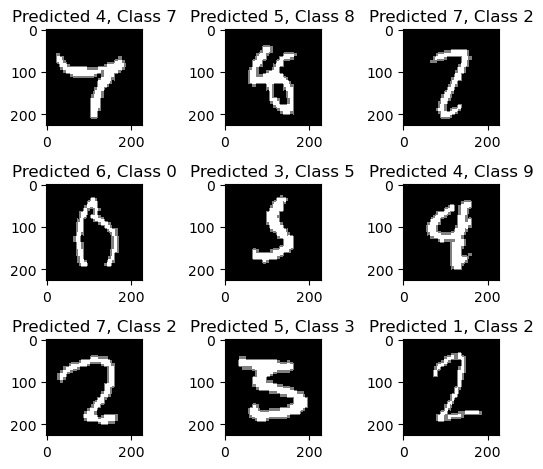

In [56]:
for i, inc in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[inc].reshape(227,227), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[inc], y_true[inc]))
    plt.tight_layout()

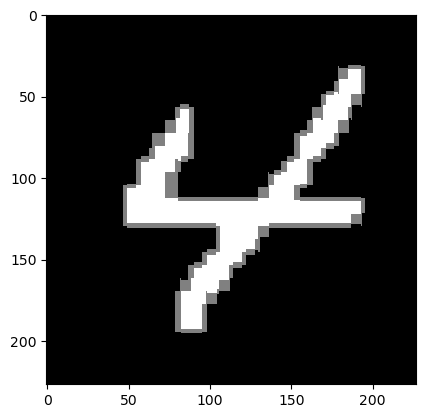

In [57]:
test_img = x_train[41]
plt.imshow(test_img.reshape(227,227), cmap='gray', interpolation='none')
plt.show()